# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
from unityagents import UnityEnvironment

%matplotlib inline

from agent import Agent

# change the path below in case you changed your envirenment path
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("Brain current name: " + brain_name)

Brain current name: BananaBrain


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


If you run this a lot of times you will se that random is a very poor decision on this case. You will get numbers between -2 and 2.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [6]:
# Deep Q-Learning function

pathToUse = 'checkpoints_saves/scenarios/' #standar path to save the checkpoints

def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.02, eps_decay=0.995, train_mode=True, 
        ckptPathName='checkpoint', goalToReach=13.0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train_mode (bool): if 'True' set environment to training mode
        
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    moving_avgs = []                   # list of moving averages
    eps = eps_start                    # initialize epsilon
    goalReached = False
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        state = env_info.vector_observations[0]                 # get current state        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                      # select an action
            env_info = env.step(action)[brain_name]             # send action to environment
            next_state = env_info.vector_observations[0]        # get next state
            reward = env_info.rewards[0]                        # get reward
            done = env_info.local_done[0]                       # see if episode has finished
            agent.step(state, action, reward, next_state, done) # learning step
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)          # save most recent score to window
        scores.append(score)                 # save most recent score to total
        moving_avg = np.mean(scores_window)  # calculate moving average
        moving_avgs.append(moving_avg)       # save most recent moving average
        eps = max(eps_end, eps_decay*eps)    # decrease epsilon
        print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg), end="")
        if i_episode % 100 == 0:
            print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, moving_avg))
        if moving_avg >= goalToReach:
            if goalReached == False:
                goalReached = True
                print('\nMy score will never be lower than 13 from now on. Episodes necessary to be that good: {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, moving_avg))
    if train_mode:
        torch.save(agent.qnetwork_local.state_dict(), pathToUse + ckptPathName + '.pth')
    return scores, moving_avgs

Now let's training our agents. It's gonna be 8 agents with differentes configurations.

### AgentV1

Type: Standard DQN.
EPS Decay: 0.98

Current Episode 100	Average Score: 2.94
Current Episode 200	Average Score: 9.94
Current Episode 300	Average Score: 11.67
Current Episode 390	Average Score: 13.07
My score will never be lower than 13 from now on. Episodes necessary to be that good: 290 episodes!	Average Score: 13.07
Current Episode 400	Average Score: 13.39
Current Episode 500	Average Score: 15.36
Current Episode 600	Average Score: 15.69
Current Episode 700	Average Score: 15.10
Current Episode 800	Average Score: 15.75
Current Episode 900	Average Score: 15.29
Current Episode 1000	Average Score: 15.82


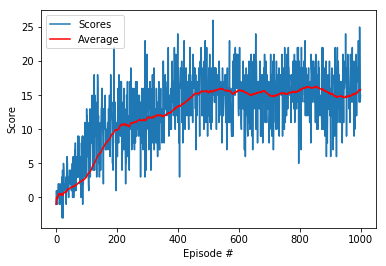

In [8]:
# run the training loop for AgentV1
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores, avgs = dqn(n_episodes=1000, eps_decay=0.98, ckptPathName='AgentV1', goalToReach=13.0)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Current Episode 1	Average Score: 0.00
Current Episode 2	Average Score: 4.50
Current Episode 3	Average Score: 9.33
Current Episode 4	Average Score: 9.75
Current Episode 5	Average Score: 8.40
Current Episode 6	Average Score: 7.00
Current Episode 7	Average Score: 8.14
Current Episode 8	Average Score: 7.12
Current Episode 9	Average Score: 8.33
Current Episode 10	Average Score: 7.50


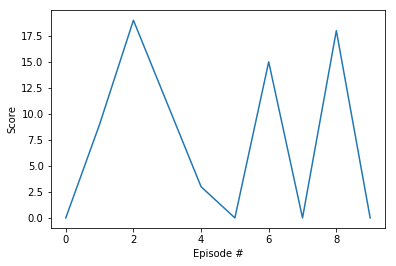

In [9]:
## Testing the AgentV1

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

# load the weights from file
pathToUse = 'checkpoints_saves/scenarios/' #standard path to save the checkpoints
agentName = 'AgentV1'
checkpoint = pathToUse + agentName + '.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### AgentV2

Type: Standard DQN.
EPS Decay: 0.95

Current Episode 100	Average Score: 2.05
Current Episode 200	Average Score: 7.58
Current Episode 300	Average Score: 10.95
Current Episode 356	Average Score: 13.05
My score will never be lower than 13 from now on. Episodes necessary to be that good: 256 episodes!	Average Score: 13.05
Current Episode 400	Average Score: 14.18
Current Episode 500	Average Score: 15.07
Current Episode 600	Average Score: 16.05
Current Episode 700	Average Score: 15.12
Current Episode 800	Average Score: 15.25
Current Episode 900	Average Score: 15.53
Current Episode 1000	Average Score: 15.71


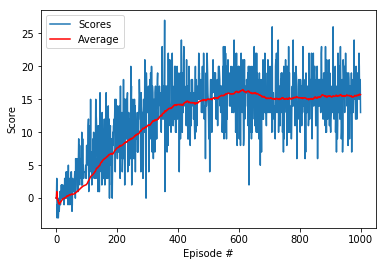

In [10]:
# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores, avgs = dqn(n_episodes=1000, eps_decay=0.95, ckptPathName='AgentV2', goalToReach=13.0)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Current Episode 1	Average Score: 21.00
Current Episode 2	Average Score: 13.50
Current Episode 3	Average Score: 15.33
Current Episode 4	Average Score: 16.50
Current Episode 5	Average Score: 16.00
Current Episode 6	Average Score: 15.83
Current Episode 7	Average Score: 16.86
Current Episode 8	Average Score: 17.12
Current Episode 9	Average Score: 17.00
Current Episode 10	Average Score: 16.90


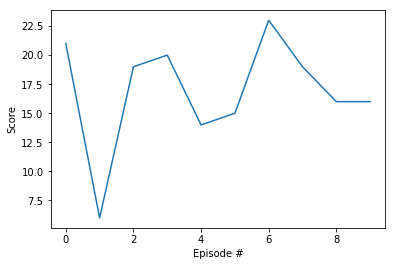

In [11]:
## Testing the AgentV2

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

# load the weights from file
pathToUse = 'checkpoints_saves/scenarios/' #standard path to save the checkpoints
agentName = 'AgentV2'
checkpoint = pathToUse + agentName + '.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### AgentV3

Type: Double DQN.
EPS Decay: 0.98

Current Episode 100	Average Score: 0.57
Current Episode 200	Average Score: 3.08
Current Episode 300	Average Score: 9.06
Current Episode 400	Average Score: 12.90
Current Episode 403	Average Score: 13.00
My score will never be lower than 13 from now on. Episodes necessary to be that good: 303 episodes!	Average Score: 13.00
Current Episode 500	Average Score: 14.20
Current Episode 600	Average Score: 15.04
Current Episode 700	Average Score: 15.63
Current Episode 800	Average Score: 14.64
Current Episode 900	Average Score: 16.17
Current Episode 1000	Average Score: 15.52


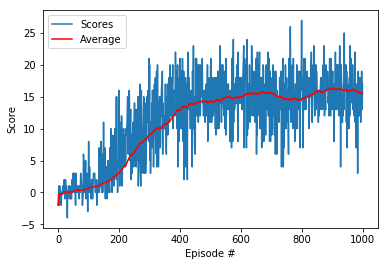

In [12]:
# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True)
scores, avgs = dqn(n_episodes=1000, eps_decay=0.98, ckptPathName='AgentV3', goalToReach=13.0)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Current Episode 1	Average Score: 23.00
Current Episode 2	Average Score: 18.50
Current Episode 3	Average Score: 18.67
Current Episode 4	Average Score: 19.25
Current Episode 5	Average Score: 20.00
Current Episode 6	Average Score: 17.67
Current Episode 7	Average Score: 18.14
Current Episode 8	Average Score: 17.75
Current Episode 9	Average Score: 16.22
Current Episode 10	Average Score: 16.60


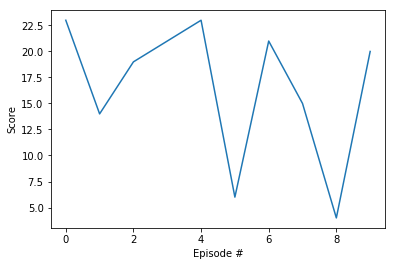

In [13]:
## Testing the AgentV3

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True)

# load the weights from file
pathToUse = 'checkpoints_saves/scenarios/' #standard path to save the checkpoints
agentName = 'AgentV3'
checkpoint = pathToUse + agentName + '.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### AgentV4

Type: Double DQN.
EPS Decay: 0.95

Current Episode 100	Average Score: 2.69
Current Episode 200	Average Score: 7.85
Current Episode 300	Average Score: 11.04
Current Episode 386	Average Score: 13.00
My score will never be lower than 13 from now on. Episodes necessary to be that good: 286 episodes!	Average Score: 13.00
Current Episode 400	Average Score: 13.49
Current Episode 500	Average Score: 15.75
Current Episode 600	Average Score: 15.38
Current Episode 700	Average Score: 15.79
Current Episode 800	Average Score: 15.36
Current Episode 900	Average Score: 15.07
Current Episode 1000	Average Score: 15.44


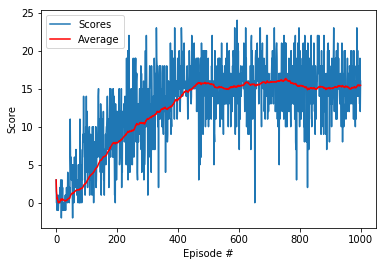

In [14]:
# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True)
scores, avgs = dqn(n_episodes=1000, eps_decay=0.95, ckptPathName='AgentV4', goalToReach=13.0)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Current Episode 1	Average Score: 20.00
Current Episode 2	Average Score: 17.00
Current Episode 3	Average Score: 17.00
Current Episode 4	Average Score: 16.75
Current Episode 5	Average Score: 16.20
Current Episode 6	Average Score: 16.50
Current Episode 7	Average Score: 17.14
Current Episode 8	Average Score: 17.50
Current Episode 9	Average Score: 17.33
Current Episode 10	Average Score: 16.80


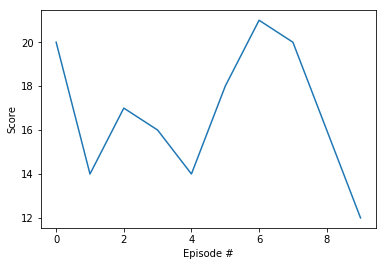

In [15]:
## Testing the AgentV4

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True)

# load the weights from file
pathToUse = 'checkpoints_saves/scenarios/' #standard path to save the checkpoints
agentName = 'AgentV4'
checkpoint = pathToUse + agentName + '.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### AgentV5

Type: Dueling.
EPS Decay: 0.98

Current Episode 100	Average Score: 0.71
Current Episode 200	Average Score: 6.48
Current Episode 300	Average Score: 10.40
Current Episode 400	Average Score: 12.55
Current Episode 445	Average Score: 13.09
My score will never be lower than 13 from now on. Episodes necessary to be that good: 345 episodes!	Average Score: 13.09
Current Episode 500	Average Score: 13.75
Current Episode 600	Average Score: 15.30
Current Episode 700	Average Score: 15.83
Current Episode 800	Average Score: 15.41
Current Episode 900	Average Score: 15.93
Current Episode 1000	Average Score: 16.29


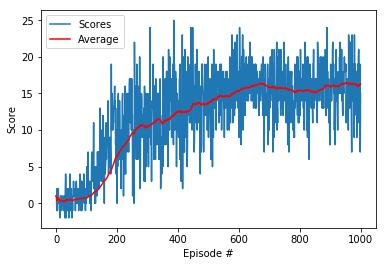

In [16]:
# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, seed=0, dueling=True)
scores, avgs = dqn(n_episodes=1000, eps_decay=0.98, ckptPathName='AgentV5', goalToReach=13.0)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Current Episode 1	Average Score: 4.00
Current Episode 2	Average Score: 11.50
Current Episode 3	Average Score: 13.00
Current Episode 4	Average Score: 11.00
Current Episode 5	Average Score: 11.80
Current Episode 6	Average Score: 13.00
Current Episode 7	Average Score: 13.43
Current Episode 8	Average Score: 13.00
Current Episode 9	Average Score: 13.11
Current Episode 10	Average Score: 14.10


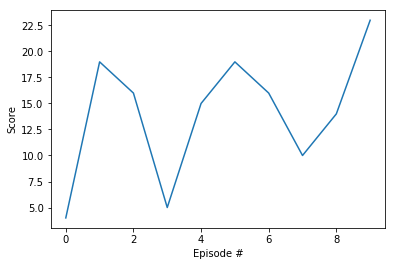

In [17]:
## Testing the AgentV5

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0, dueling=True)

# load the weights from file
pathToUse = 'checkpoints_saves/scenarios/' #standard path to save the checkpoints
agentName = 'AgentV5'
checkpoint = pathToUse + agentName + '.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### AgentV6

Type: Dueling.
EPS Decay: 0.98

Current Episode 100	Average Score: 2.70
Current Episode 200	Average Score: 6.24
Current Episode 300	Average Score: 10.35
Current Episode 391	Average Score: 13.04
My score will never be lower than 13 from now on. Episodes necessary to be that good: 291 episodes!	Average Score: 13.04
Current Episode 400	Average Score: 13.07
Current Episode 500	Average Score: 15.76
Current Episode 600	Average Score: 15.60
Current Episode 700	Average Score: 16.50
Current Episode 800	Average Score: 16.46
Current Episode 900	Average Score: 17.28
Current Episode 1000	Average Score: 16.53


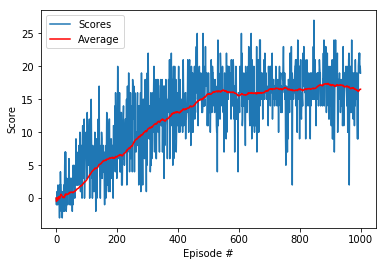

In [18]:
# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, seed=0, dueling=True)
scores, avgs = dqn(n_episodes=1000, eps_decay=0.95, ckptPathName='AgentV6', goalToReach=13.0)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Current Episode 1	Average Score: 19.00
Current Episode 2	Average Score: 18.50
Current Episode 3	Average Score: 17.33
Current Episode 4	Average Score: 18.00
Current Episode 5	Average Score: 18.20
Current Episode 6	Average Score: 17.83
Current Episode 7	Average Score: 17.00
Current Episode 8	Average Score: 16.75
Current Episode 9	Average Score: 17.67
Current Episode 10	Average Score: 18.00


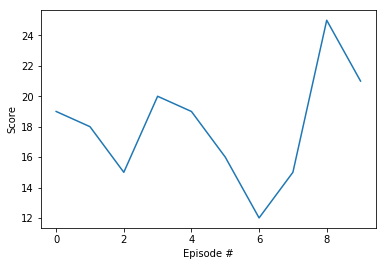

In [19]:
## Testing the AgentV6

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0, dueling=True)

# load the weights from file
pathToUse = 'checkpoints_saves/scenarios/' #standard path to save the checkpoints
agentName = 'AgentV6'
checkpoint = pathToUse + agentName + '.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### AgentV7

Type: DDQN + Dueling
EPS Decay: 0.98

Current Episode 100	Average Score: 1.34
Current Episode 200	Average Score: 4.80
Current Episode 300	Average Score: 9.25
Current Episode 400	Average Score: 12.39
Current Episode 417	Average Score: 13.05
My score will never be lower than 13 from now on. Episodes necessary to be that good: 317 episodes!	Average Score: 13.05
Current Episode 500	Average Score: 15.21
Current Episode 600	Average Score: 14.99
Current Episode 700	Average Score: 15.92
Current Episode 800	Average Score: 15.41
Current Episode 900	Average Score: 15.61
Current Episode 1000	Average Score: 15.27


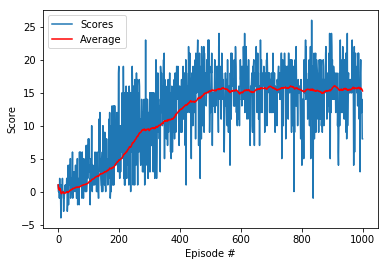

In [20]:
# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True, dueling=True)
scores, avgs = dqn(n_episodes=1000, eps_decay=0.98, ckptPathName='AgentV7', goalToReach=13.0)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Current Episode 1	Average Score: 1.00
Current Episode 2	Average Score: 1.50
Current Episode 3	Average Score: 5.33
Current Episode 4	Average Score: 6.25
Current Episode 5	Average Score: 7.40
Current Episode 6	Average Score: 9.33
Current Episode 7	Average Score: 11.29
Current Episode 8	Average Score: 12.38
Current Episode 9	Average Score: 11.89
Current Episode 10	Average Score: 12.50


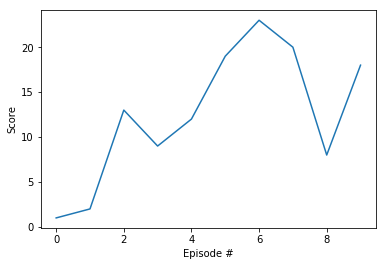

In [21]:
## Testing the AgentV7

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True, dueling=True)

# load the weights from file
pathToUse = 'checkpoints_saves/scenarios/' #standard path to save the checkpoints
agentName = 'AgentV7'
checkpoint = pathToUse + agentName + '.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### AgentV8

Type: DDQN + Dueling
EPS Decay: 0.95

Current Episode 100	Average Score: 0.47
Current Episode 200	Average Score: 6.14
Current Episode 300	Average Score: 10.36
Current Episode 361	Average Score: 13.12
My score will never be lower than 13 from now on. Episodes necessary to be that good: 261 episodes!	Average Score: 13.12
Current Episode 400	Average Score: 14.23
Current Episode 500	Average Score: 16.03
Current Episode 600	Average Score: 15.30
Current Episode 700	Average Score: 15.09
Current Episode 800	Average Score: 14.71
Current Episode 900	Average Score: 15.01
Current Episode 1000	Average Score: 16.08


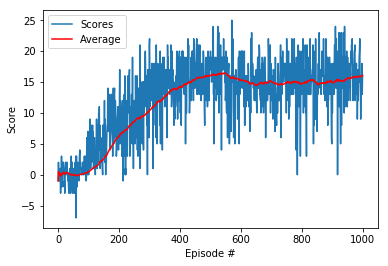

In [22]:
# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True, dueling=True)
scores, avgs = dqn(n_episodes=1000, eps_decay=0.98, ckptPathName='AgentV8', goalToReach=13.0)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='Scores')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Current Episode 1	Average Score: 24.00
Current Episode 2	Average Score: 20.00
Current Episode 3	Average Score: 18.00
Current Episode 4	Average Score: 18.00
Current Episode 5	Average Score: 17.00
Current Episode 6	Average Score: 16.83
Current Episode 7	Average Score: 16.57
Current Episode 8	Average Score: 16.75
Current Episode 9	Average Score: 17.22
Current Episode 10	Average Score: 17.20


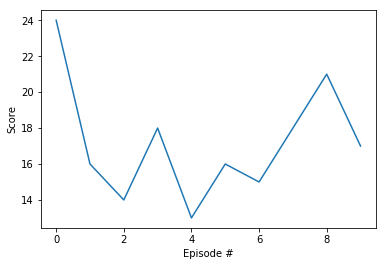

In [23]:
## Testing the AgentV8

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double=True, dueling=True)

# load the weights from file
pathToUse = 'checkpoints_saves/scenarios/' #standard path to save the checkpoints
agentName = 'AgentV8'
checkpoint = pathToUse + agentName + '.pth'
agent.qnetwork_local.load_state_dict(torch.load(checkpoint))

num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        #agent.step(state, action, reward, next_state, done) # do the learning

        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rCurrent Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [24]:
env.close()